In [8]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#create the dataframe for the breast cancer data set
#create column names because they are not in the data
column_names=[
    "class",
    "age",
    "menopause",
    "tumor_size",
    "inv_nodes",
    "node_caps",
    "deg_malig",
    "breast",
    "breast_quad",
    "irradiat"
]

df = pd.read_csv(
    r"C:\Users\sgear\Downloads\breast+cancer\breast-cancer.data",
    header=None,
    names=column_names
)

print("First five rows")
print(df.head())
print("Info")
print(df.info())
print("Columns")
print(df.columns)


First five rows
                  class    age menopause tumor_size inv_nodes node_caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg_malig breast breast_quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 

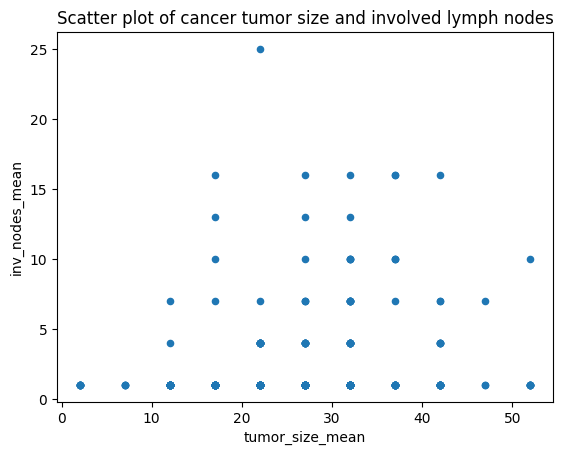

In [ ]:

#cluster tumor size and involved lymph nodes
#I want to use two variables for simplicity to start. I'd like to have a scatter plot of my data to help me visualize.
#unfortunately, I have categorical variables. I'm going to take the mean of each category as the new value. 
#unfortunately, my values are currently stored as strings

def tumor_size_transform(x):
    if x=="0-4":
        return 2
    elif x=="5-9":
        return 7
    elif x=="10-14":
        return 12
    elif x=="15-19":
        return 17
    elif x=="20-24":
        return 22
    elif x=="25-29":
        return 27
    elif x=="30-34":
        return 32
    elif x=="35-39":
        return 37
    elif x=="40-44":
        return 42
    elif x=="45-49":
        return 47
    elif x=="50-54":
        return 52
    elif x=="55-59":
        return 57
    else:
        return None  
#create a new column for this transformed data
df["tumor_size_mean"]=df["tumor_size"].apply(tumor_size_transform)

def inv_nodes_transform(x):
    if x=="0-2":
        return 1
    elif x=="3-5":
        return 4
    elif x=="6-8":
        return 7
    elif x=="9-11":
        return 10
    elif x=="12-14":
        return 13
    elif x=="15-17":
        return 16
    elif x=="18-20":
        return 19
    elif x=="21-23":
        return 22
    elif x=="24-26":
        return 25
    elif x=="27-29":
        return 28
    elif x=="30-32":
        return 31
    elif x=="33-35":
        return 34
    elif x=="36-39":
        return 37
    else:
        return None
#create a new column for this transformed data
df["inv_nodes_mean"]=df["inv_nodes"].apply(inv_nodes_transform)

    
df.plot(kind="scatter", x="tumor_size_mean", y="inv_nodes_mean")
plt.title("Scatter plot of cancer tumor size and involved lymph nodes")
plt.show()


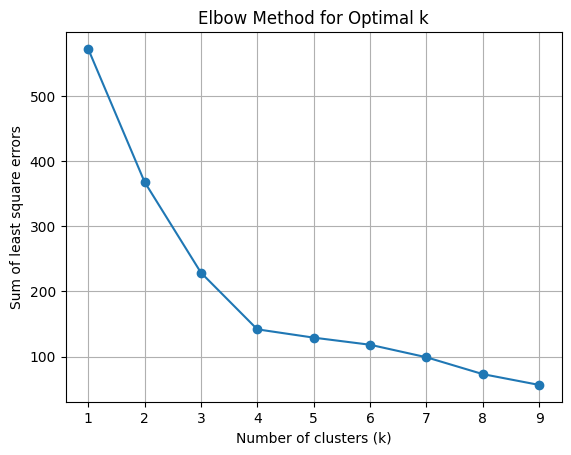

In [ ]:

#now let's create a new dataframe with only the two columns of interest
subset=["tumor_size_mean", "inv_nodes_mean"]
tumorandnodes=df[subset]

#because our two categorical variables are on different scales, we first need to rescale the data
tumorandnodes_scaled=StandardScaler().fit_transform(tumorandnodes)

#now that we have scaled data, we will compute sum of least squares for each value of k and store them in a location we can plot for the elbow method
sumleastsquarevalues=[]
#I will use k from 1 to 10 as I iterate
kvalue=range(1, 10)

for k in kvalue:
    kmeans=KMeans(n_clusters=k, random_state=12)
    kmeans.fit(tumorandnodes_scaled)
    sumleastsquarevalues.append(kmeans.inertia_)

#now plot the k values against the sumofleastsquares and examine visually
plt.figure()
plt.plot(kvalue, sumleastsquarevalues, marker='o')
plt.xticks(kvalue)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of least square errors")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


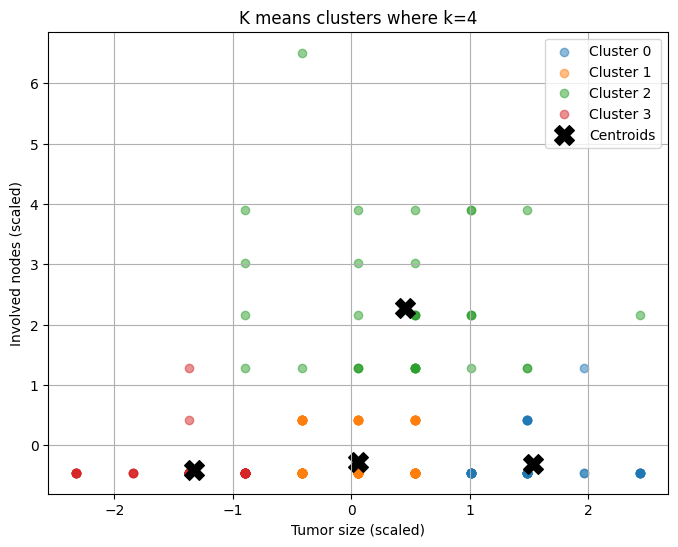

In [ ]:
#based on my graph, the optimal number of clusters is 4. At this point, adding clusters does not change my least squares significantly.
#now I will graph my data, clusters, and centroids
#let's continue to use the tumorandnodes_scaled dataframe
kmeans=KMeans(n_clusters=4, random_state=12, n_init=10)
kmeans.fit(tumorandnodes_scaled)

#to help with graphing, I want to add the cluster assignment as a new column
df["cluster"]=kmeans.labels_
plt.figure(figsize=(8,6))

#now I can plot data points with color by cluster
for cluster_id in range(4):
    cluster_points=tumorandnodes_scaled[df["cluster"]==cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}", alpha=0.5)

#I will also plot the centroids
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.xlabel("Tumor size (scaled)")
plt.ylabel("Involved nodes (scaled)")
plt.title("K means clusters where k=4")
plt.legend()
plt.grid(True)

#based on my analysis, tumor size has a normal distribution with involved nodes. The most involved nodes were clustered with mid sized tumors. 
